In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0532.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0282.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1401.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0914.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0691.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0972.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0818.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0463.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0930.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1323.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1347.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_1354.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0704.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/pituitary/Tr-pi_0

Preprocessing.py

In [2]:
pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=d3202fcd80d0c324bad8ef1603f594e30e910d4345e389ae2586a7af8cae6799
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Preprocessing.py

import numpy as np
from tqdm import tqdm
import cv2
import os
import imutils

def crop_img(img):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    ADD_PIXELS = 0
    new_img = img[extTop[1] - ADD_PIXELS:extBot[1] + ADD_PIXELS, extLeft[0] - ADD_PIXELS:extRight[0] + ADD_PIXELS].copy()

    return new_img

if __name__ == "__main__":
    training = "/kaggle/input/brain-tumor-mri-dataset/Training"
    testing = "/kaggle/input/brain-tumor-mri-dataset/Testing"
    training_dir = os.listdir(training)
    testing_dir = os.listdir(testing)
    IMG_SIZE = 256

    for dir in training_dir:
        save_path = 'cleaned/Training/' + dir
        path = os.path.join(training, dir)
        image_dir = os.listdir(path)
        for img in image_dir:
            image = cv2.imread(os.path.join(path, img))
            new_img = crop_img(image)
            new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            cv2.imwrite(save_path + '/' + img, new_img)

    for dir in testing_dir:
        save_path = 'cleaned/Testing/' + dir
        path = os.path.join(testing, dir)
        image_dir = os.listdir(path)
        for img in image_dir:
            image = cv2.imread(os.path.join(path, img))
            new_img = crop_img(image)
            new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))
            if not os.path.exists(save_path):
                os.makedirs(save_path)
            cv2.imwrite(save_path + '/' + img, new_img)


Brain Tumor classification

100%|██████████| 300/300 [00:01<00:00, 222.76it/s]


(5712, 200, 200, 3)
(1311, 200, 200, 3)


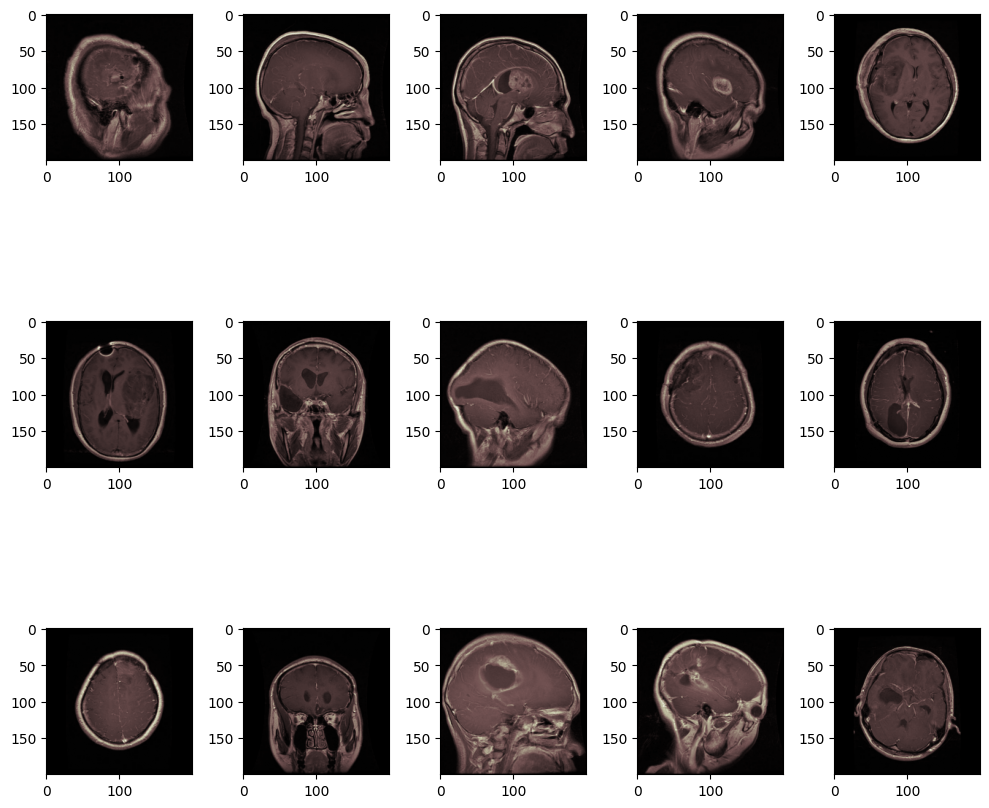

(1143, 200, 200, 3)
94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 100, 100, 64)         256       ['conv1_conv[0][0]']          
 on)     

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


229/229 [==============================] - 1513s 7s/step - loss: 0.3003 - accuracy: 0.8921 - val_loss: 2.1311 - val_accuracy: 0.2730 - lr: 1.0000e-04


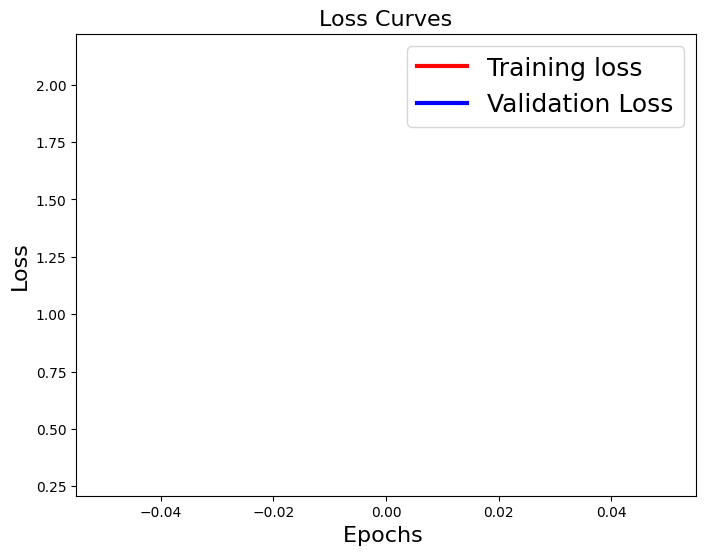

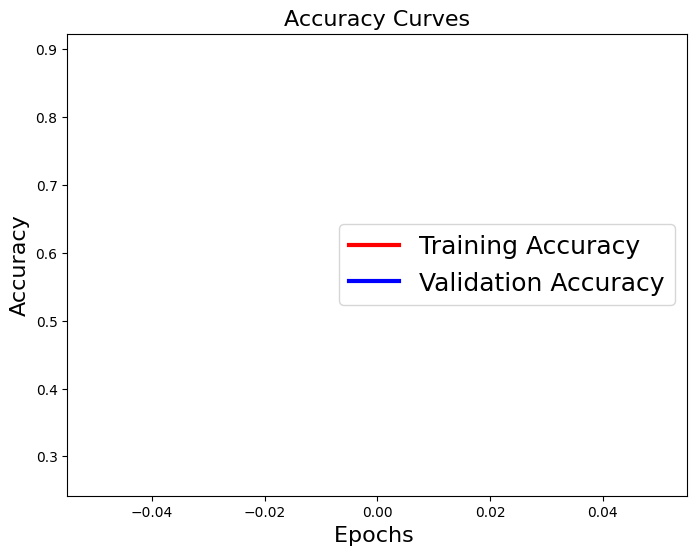

41/41 [==============================] - 98s 2s/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.22      0.66      0.33       300
           1       0.00      0.00      0.00       306
           2       0.46      0.47      0.47       405
           3       0.00      0.00      0.00       300

    accuracy                           0.30      1311
   macro avg       0.17      0.28      0.20      1311
weighted avg       0.19      0.30      0.22      1311

41/41 [==============================] - 97s 2s/step - loss: 2.0280 - accuracy: 0.2975


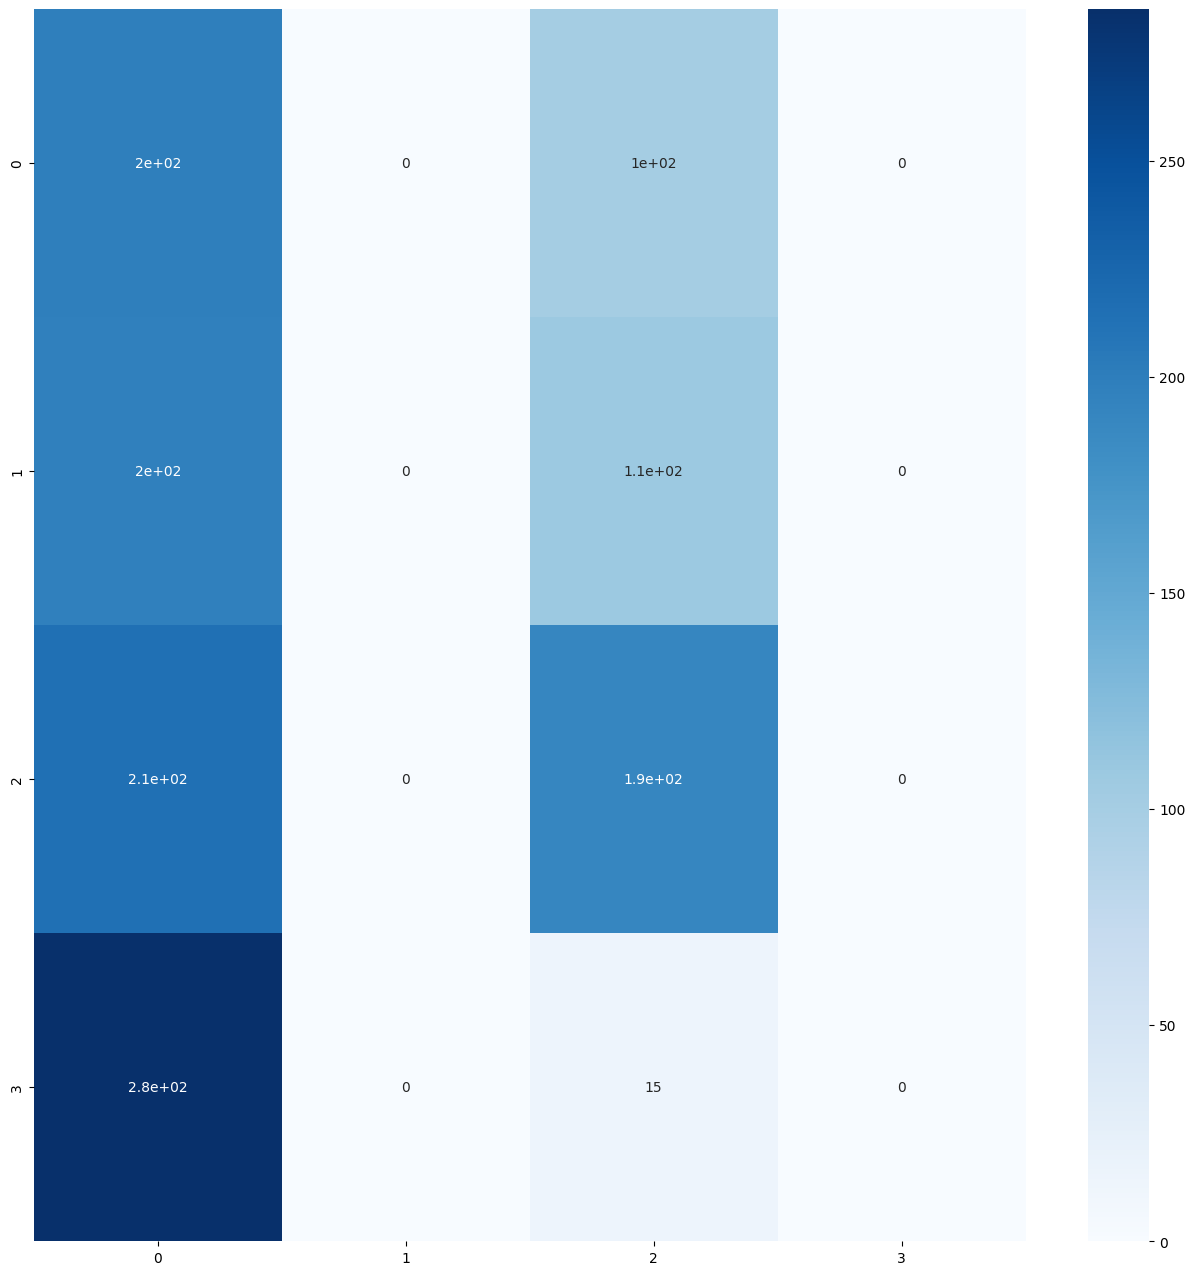

In [4]:
# Brain_Tumor_Classification.ipynb

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, LambdaCallback
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
import numpy as np
import itertools 
import datetime
import cv2
import os
import io

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

x_train = []  # training images.
y_train = []  # training labels.
x_test = []  # testing images.
y_test = []  # testing labels.

image_size = 200

for label in labels:
    trainPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Training', label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file), 0)  # load images in gray.
        image = cv2.bilateralFilter(image, 2, 50, 50)  # remove images noise.
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)  # produce a pseudocolored image.
        image = cv2.resize(image, (image_size, image_size))  # resize images into 150*150.
        x_train.append(image)
        y_train.append(labels.index(label))

    testPath = os.path.join('/kaggle/input/brain-tumor-mri-dataset/Testing', label)
    for file in tqdm(os.listdir(testPath)):
        image = cv2.imread(os.path.join(testPath, file), 0)
        image = cv2.bilateralFilter(image, 2, 50, 50)
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)
        image = cv2.resize(image, (image_size, image_size))
        x_test.append(image)
        y_test.append(labels.index(label))

x_train = np.array(x_train) / 255.0  # normalize Images into range 0 to 1.
x_test = np.array(x_test) / 255.0

print(x_train.shape)
print(x_test.shape)

images = [x_train[i] for i in range(15)]
fig, axes = plt.subplots(3, 5, figsize=(10, 10))
axes = axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

x_train, y_train = shuffle(x_train, y_train, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train)  # One Hot Encoding on the labels
y_test = tf.keras.utils.to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)  # Dividing the dataset into Training and Validation sets.

print(x_val.shape)

# ImageDataGenerator transforms each image in the batch by a series of random translations, rotations, etc.
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True)

# After you have created and configured your ImageDataGenerator, you must fit it on your data.
datagen.fit(x_train)

net = ResNet50(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    include_top=False,  # Do not include the ImageNet classifier at the top.
    input_shape=(image_size, image_size, 3))

model = net.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.4)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs=net.input, outputs=model)

# compile our model.
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Load tensorboard extension
%load_ext tensorboard

# Set up confusion matrix logging
class_names = list(labels)

def plot_to_image(figure):
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(figure)
    buf.seek(0)

    digit = tf.image.decode_png(buf.getvalue(), channels=4)
    digit = tf.expand_dims(digit, 0)

    return digit

def plot_confusion_matrix(cm, class_names):
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    threshold = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return figure

# Following function will make predictions from the model and log the confusion matrix as an image.
def log_confusion_matrix(epoch, logs):
    predictions = np.argmax(model.predict(x_test), axis=1)
    cm = confusion_matrix(np.argmax(y_test, axis=1), predictions)
    figure = plot_confusion_matrix(cm, class_names=class_names)
    cm_image = plot_to_image(figure)

    with file_writer_cm.as_default():
        tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Remove previous log folder
!rm -fr logs
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Create a writer variable for writing into the log folder.
file_writer_cm = tf.summary.create_file_writer(logdir)

tensorboard = TensorBoard(logdir, histogram_freq=1)

BATCH_SIZE = 64
EPOCHS = 1

Checkpoint = ModelCheckpoint(filepath='model-{epoch:02d}-{val_accuracy:.2f}-{val_loss:.2f}.h5',
                              monitor='val_loss', verbose=1, save_best_only=True, mode='min')

ES = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, mode='min', restore_best_weights=True, verbose=1)

RL = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1, mode='min')

callbacks = [ES, RL, tensorboard, Checkpoint, LambdaCallback(on_epoch_end=log_confusion_matrix)]

history = model.fit(datagen.flow(x_train, y_train, batch_size=20), validation_data=(x_val, y_val), epochs=EPOCHS,
                    callbacks=callbacks)

# Plot the Loss Curves
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
plt.show()

# Plot the Accuracy Curves
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
plt.show()

predicted_classes = np.argmax(model.predict(x_test), axis=1)
confusionmatrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
plt.figure(figsize=(16, 16))
sns.heatmap(confusionmatrix, cmap='Blues', annot=True, cbar=True)
print(classification_report(np.argmax(y_test, axis=1), predicted_classes))

loss, acc = model.evaluate(x_test, y_test)


preprocess the notumor for GAN Training

In [5]:
import cv2
import os
import imutils

# Function to preprocess images for GAN training
def preprocess_images_for_gan(image_path, save_path, img_size=200):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    for file in os.listdir(image_path):
        image = cv2.imread(os.path.join(image_path, file), cv2.IMREAD_GRAYSCALE)
        image = cv2.bilateralFilter(image, 2, 50, 50)
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)
        image = cv2.resize(image, (img_size, img_size))
        
        # Additional preprocessing specific to GAN training, e.g., normalization
        # You may need to adapt this based on the characteristics of your GAN architecture
        
        # Save the preprocessed image
        cv2.imwrite(os.path.join(save_path, file), image)

# Paths for "No Tumor" class images
no_tumor_train_path = '/kaggle/input/brain-tumor-mri-dataset/Training/notumor'
no_tumor_save_path = '/kaggle/working/preprocessed_images/notumor'  # Update with your desired save path

# Preprocess "No Tumor" class images for GAN training
preprocess_images_for_gan(no_tumor_train_path, no_tumor_save_path)


Training GAN on notumor images

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten
from keras.optimizers import Adam
from keras.layers import Flatten

# Function to build the generator model
def build_generator(noise_dim=100, img_size=200):
    model = Sequential()
    model.add(Dense(256, input_dim=noise_dim, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(img_size * img_size, activation='sigmoid'))  # Adjust the output layer based on image dimensions
    model.add(Reshape((img_size, img_size, 1)))
    return model


# Function to build the discriminator model
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Function to build the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Build and compile the GAN
noise_dim = 100
img_shape = (200, 200, 1)  # Update dimensions based on your preprocessed image size

generator = build_generator(noise_dim)
discriminator = build_discriminator(img_shape)

discriminator.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

gan = build_gan(generator, discriminator)
gan.compile(optimizer=Adam(), loss='binary_crossentropy')

# Function to train the GAN
def train_gan(generator, discriminator, gan, x_train_no_tumor, epochs=1, batch_size=32):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        generated_images = generator.predict(noise)

        idx = np.random.randint(0, x_train_no_tumor.shape[0], batch_size)
        real_images = x_train_no_tumor[idx]

        labels_real = np.ones((batch_size, 1))
        labels_fake = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_images, labels_real)
        d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        labels_gan = np.ones((batch_size, 1))

        g_loss = gan.train_on_batch(noise, labels_gan)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

# Train the GAN on the preprocessed "No Tumor" class images
x_train_no_tumor = []

for file in os.listdir(no_tumor_save_path):
    image = cv2.imread(os.path.join(no_tumor_save_path, file), cv2.IMREAD_GRAYSCALE)
    x_train_no_tumor.append(image)

x_train_no_tumor = np.array(x_train_no_tumor) / 255.0  # Normalize images to range [0, 1]

# Reshape to match the expected input shape of the GAN
x_train_no_tumor = np.expand_dims(x_train_no_tumor, axis=-1)

# Train the GAN
train_gan(generator, discriminator, gan, x_train_no_tumor)


1/1 [==============================] - 0s 92ms/step
Epoch 0, D Loss: 82.67344218492508, G Loss: 9.534634311701912e-17


generating synthetic images

In [7]:
# Function to generate synthetic "No Tumor" class images using the trained generator
def generate_synthetic_images(generator, num_synthetic_images, noise_dim=100):
    noise = np.random.normal(0, 1, (num_synthetic_images, noise_dim))
    synthetic_images = generator.predict(noise)
    return synthetic_images

# Generate synthetic "No Tumor" class images
num_synthetic_images = 1000  # Adjust as needed
synthetic_images = generate_synthetic_images(generator, num_synthetic_images)

# Combine synthetic images with original "No Tumor" class images
x_train_no_tumor_synthetic = np.concatenate([x_train_no_tumor, synthetic_images], axis=0)
y_train_no_tumor_synthetic = np.concatenate([np.zeros((len(x_train_no_tumor),)), np.ones((num_synthetic_images,))])

# Shuffle the augmented dataset
x_train_no_tumor_synthetic, y_train_no_tumor_synthetic = shuffle(x_train_no_tumor_synthetic, y_train_no_tumor_synthetic, random_state=42)


32/32 [==============================] - 1s 23ms/step


Displaying the synthetic images

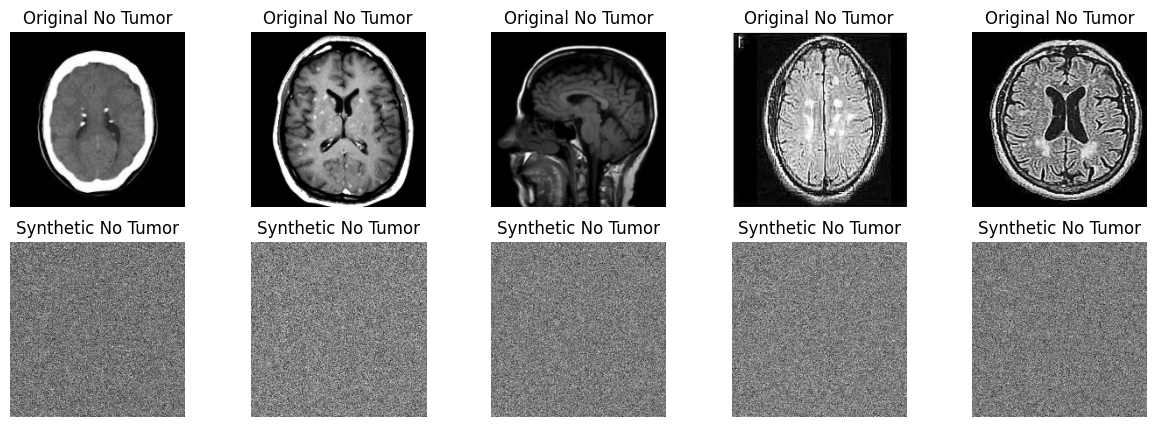

In [8]:
import matplotlib.pyplot as plt

# Function to display original and synthetic images
def display_images(original_images, synthetic_images, num_display=5):
    fig, axes = plt.subplots(2, num_display, figsize=(15, 5))

    for i in range(num_display):
        axes[0, i].imshow(original_images[i, :, :, 0], cmap='gray')
        axes[0, i].set_title('Original No Tumor')

        axes[1, i].imshow(synthetic_images[i, :, :, 0], cmap='gray')
        axes[1, i].set_title('Synthetic No Tumor')

        axes[0, i].axis('off')
        axes[1, i].axis('off')

    plt.show()

# Display original and synthetic images
num_display_images = 5
display_images(x_train_no_tumor[:num_display_images], synthetic_images[:num_display_images])


In [11]:
!zip -r file.zip /kaggle/working/cleaned/Training/pituitary

  adding: kaggle/working/cleaned/Training/pituitary/ (stored 0%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_1291.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_1014.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_0167.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_0080.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_0906.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_1310.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_0147.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_0813.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_0306.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_1168.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pituitary/Tr-pi_1185.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/pi

In [13]:
!zip -r file1.zip /kaggle/working/cleaned/Training/glioma

  adding: kaggle/working/cleaned/Training/glioma/ (stored 0%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_1282.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_0592.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_1316.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_0625.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_0110.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_0306.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_1069.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_0231.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_1265.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_0940.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_1116.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/glioma/Tr-gl_0973.jpg (deflated 1%)
  

In [14]:
!zip -r Cleaned_no_tumor.zip /kaggle/working/cleaned/Training/notumor

  adding: kaggle/working/cleaned/Training/notumor/ (stored 0%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_0302.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_0994.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_0367.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_0827.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_1351.jpg (deflated 2%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_0792.jpg (deflated 2%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_1236.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_1483.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_0520.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_0540.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_1482.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/notumor/Tr-no_0961.jpg (de

In [15]:
!zip -r Cleaned_meningioma.zip /kaggle/working/cleaned/Training/meningioma

  adding: kaggle/working/cleaned/Training/meningioma/ (stored 0%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_1315.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_0879.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_0947.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_1021.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_0686.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_0997.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_0125.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_1022.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_1325.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_0837.jpg (deflated 1%)
  adding: kaggle/working/cleaned/Training/meningioma/Tr-me_1151.jpg (deflated 1%)
  adding: kaggle/working/cleaned

In [16]:
!zip -r GAN_Preprocessed_notumor.zip /kaggle/working/preprocessed_images/notumor

  adding: kaggle/working/preprocessed_images/notumor/ (stored 0%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_0302.jpg (deflated 4%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_0994.jpg (deflated 2%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_0367.jpg (deflated 2%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_0827.jpg (deflated 3%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_1351.jpg (deflated 2%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_0792.jpg (deflated 1%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_1236.jpg (deflated 2%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_1483.jpg (deflated 1%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_0520.jpg (deflated 2%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_0540.jpg (deflated 7%)
  adding: kaggle/working/preprocessed_images/notumor/Tr-no_1482.jpg (deflated 2%)
  adding: kaggle/working/preproc